In [151]:
import pickle
import seq_utils
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import ast


# create a custom colourmap for use throughout
colors = ["#5e8fb4", "#FFFFFF", "#e6b4b0"]
n_bins = 500  # Discretizes the interpolation into bins
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=n_bins)


def load_dataframe(inputfile):

    # with open(snakemake.input.embedding_df, "rb") as input_file:
    #     embedding_df = pickle.load(input_file)

    # rb is read bytes
    # this loads it into a pandas df
    with open(inputfile, "rb") as input_file:
        embedding_df = pickle.load(input_file)

    embedding_df['Clade'] = embedding_df['info'].apply(tag_node)

    return embedding_df


def tag_node(info):
    with open('/data/reportdata/combined_nodes/NR1_ids.txt', 'r') as file:
        nr1_names = set(line.strip() for line in file)

    with open('/data/reportdata/combined_nodes/NR4_ids.txt', 'r') as file:
        nr4_names = set(line.strip() for line in file)

    if info in nr1_names:
        return 'NR1'
    elif info in nr4_names:
        return 'NR4'
    else:
        return 'Other'

In [152]:
# embeddings_df = load_dataframe('../../familyprediction/Nuclear_Receptor_Notebooks/embdding_df.csv')
# embeddings_df = load_dataframe('/data/ancestor_embedding_combined_df.csv')


# # with open('../ancestor_embedding_combined_nonpickle.csv', 'r') as input:
# # with open('../combined_ancestor_embeddings_nonpickle_fromscript.csv', 'r') as input:
#     # embeddings_df = pd.read_csv(input)

# embeddings_df['Clade'] = embeddings_df['info'].apply(tag_node)


# df = embeddings_df.drop(columns=['info', 'sequence', 'model_name', 
#                                  'protbert_max_embedding', 'protbert_mean_embedding', 
#                                  'protbert_weighted_embedding'])

# df = df.join(pd.DataFrame(df.pop('protbert_cls_embedding').tolist(), index=df.index))


# # Function to clean and convert the string to a list
# def clean_and_convert(array_str):
#     # Add commas between numbers
#     cleaned_str = re.sub(r'\s+', ', ', array_str.strip())
#     return np.fromstring(cleaned_str.strip("[]"), sep=',')

# # Apply the function to the 'protbert_cls_embedding' column
# df['protbert_cls_embedding'] = df['protbert_cls_embedding'].apply(
#     lambda x: clean_and_convert(x) if isinstance(x, str) else x
# )

# # Expand 'protbert_cls_embedding' into separate columns
# df = df.join(pd.DataFrame(df.pop('protbert_cls_embedding').tolist(), index=df.index))



# df2 = df.copy(deep=True)

# label_encoder = preprocessing.LabelEncoder()
# df.Clade = label_encoder.fit_transform(df.Clade)
# df_shuffle = df.sample(frac=1, random_state=10)

# df = df_shuffle

In [153]:
#   THIS IS FOR OPENING THE ONE I CREATED ON THE SERVER AS A WORKAROUND TO UNPICKLING

with open('../logregtest_df.csv', 'r') as input:
    df = pd.read_csv(input)


print(df.columns)

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

Index(['Unnamed: 0', 'Clade', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022',
       '1023'],
      dtype='object', length=1026)


,Clade,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,Other,-0.012716,0.075310,-0.031743,-0.311650,0.064559,-0.094649,0.102135,0.091691,-0.245344,...,0.029238,-0.269981,0.095751,-0.204868,-0.508713,-0.589032,-0.148013,-0.118036,-0.162274,-0.228878
1,Other,-0.000579,0.113182,0.011561,-0.278300,-0.015825,-0.126106,0.146727,0.190932,-0.292280,...,0.055398,-0.261072,0.114731,-0.159509,-0.524093,-0.470052,-0.166740,-0.181831,-0.091401,-0.267470
2,Other,-0.002152,0.114452,0.003671,-0.274833,-0.025231,-0.122571,0.149635,0.187354,-0.277033,...,0.038601,-0.257720,0.112493,-0.161743,-0.530528,-0.460306,-0.161191,-0.182176,-0.102340,-0.277791
3,Other,0.011442,0.108292,0.036612,-0.278402,-0.013371,-0.098801,0.126109,0.148009,-0.236601,...,0.053015,-0.272954,0.115622,-0.135069,-0.607785,-0.540449,-0.227975,-0.225880,-0.083361,-0.317356
4,Other,0.021269,0.107990,0.033377,-0.285039,0.006362,-0.139544,0.117882,0.141900,-0.218672,...,0.005007,-0.255665,0.106898,-0.103109,-0.587321,-0.609225,-0.188791,-0.152623,-0.102898,-0.290594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,Other,0.024458,0.077356,-0.028204,-0.234214,0.141610,-0.055855,0.160610,0.084006,-0.351228,...,0.043993,-0.291143,0.056715,-0.138436,-0.514819,-0.537796,-0.217952,-0.167707,-0.261205,-0.146934
1078,Other,-0.001572,0.094767,-0.076020,-0.258028,0.172052,-0.098984,0.119521,0.116670,-0.312744,...,0.023157,-0.267771,0.099526,-0.175747,-0.504034,-0.606887,-0.147339,-0.078876,-0.229814,-0.164677
1079,Other,0.003975,0.103656,-0.062001,-0.255754,0.165574,-0.095061,0.130275,0.122535,-0.315015,...,0.028265,-0.263244,0.095615,-0.164953,-0.514537,-0.601700,-0.160659,-0.087596,-0.230938,-0.164564
1080,Other,0.032536,0.072395,0.003494,-0.314581,0.174726,-0.107231,0.100944,0.112198,-0.255413,...,0.054200,-0.265759,0.107152,-0.070363,-0.527493,-0.685247,-0.177666,-0.148000,-0.215106,-0.220665


In [154]:
df

,Clade,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,Other,-0.012716,0.075310,-0.031743,-0.311650,0.064559,-0.094649,0.102135,0.091691,-0.245344,...,0.029238,-0.269981,0.095751,-0.204868,-0.508713,-0.589032,-0.148013,-0.118036,-0.162274,-0.228878
1,Other,-0.000579,0.113182,0.011561,-0.278300,-0.015825,-0.126106,0.146727,0.190932,-0.292280,...,0.055398,-0.261072,0.114731,-0.159509,-0.524093,-0.470052,-0.166740,-0.181831,-0.091401,-0.267470
2,Other,-0.002152,0.114452,0.003671,-0.274833,-0.025231,-0.122571,0.149635,0.187354,-0.277033,...,0.038601,-0.257720,0.112493,-0.161743,-0.530528,-0.460306,-0.161191,-0.182176,-0.102340,-0.277791
3,Other,0.011442,0.108292,0.036612,-0.278402,-0.013371,-0.098801,0.126109,0.148009,-0.236601,...,0.053015,-0.272954,0.115622,-0.135069,-0.607785,-0.540449,-0.227975,-0.225880,-0.083361,-0.317356
4,Other,0.021269,0.107990,0.033377,-0.285039,0.006362,-0.139544,0.117882,0.141900,-0.218672,...,0.005007,-0.255665,0.106898,-0.103109,-0.587321,-0.609225,-0.188791,-0.152623,-0.102898,-0.290594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,Other,0.024458,0.077356,-0.028204,-0.234214,0.141610,-0.055855,0.160610,0.084006,-0.351228,...,0.043993,-0.291143,0.056715,-0.138436,-0.514819,-0.537796,-0.217952,-0.167707,-0.261205,-0.146934
1078,Other,-0.001572,0.094767,-0.076020,-0.258028,0.172052,-0.098984,0.119521,0.116670,-0.312744,...,0.023157,-0.267771,0.099526,-0.175747,-0.504034,-0.606887,-0.147339,-0.078876,-0.229814,-0.164677
1079,Other,0.003975,0.103656,-0.062001,-0.255754,0.165574,-0.095061,0.130275,0.122535,-0.315015,...,0.028265,-0.263244,0.095615,-0.164953,-0.514537,-0.601700,-0.160659,-0.087596,-0.230938,-0.164564
1080,Other,0.032536,0.072395,0.003494,-0.314581,0.174726,-0.107231,0.100944,0.112198,-0.255413,...,0.054200,-0.265759,0.107152,-0.070363,-0.527493,-0.685247,-0.177666,-0.148000,-0.215106,-0.220665


In [155]:
print((df['Clade'] == 'NR1').sum())
print((df['Clade'] == 'NR4').sum())

546
94


In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import ast
import re


In [157]:

# Step 1: Encode the Clade column if necessary
le = LabelEncoder()
df['Clade_encoded'] = le.fit_transform(df['Clade'])


# Step 2: Define features (X) and target (y)
X = df.drop(columns=['Clade', 'Clade_encoded'])  # Drop non-numerical columns
y = df['Clade_encoded']

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# apply smote to correct class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Step 4: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the logistic regression model
model = LogisticRegression(max_iter=100_0000)  # You can increase max_iter if necessary
model.fit(X_train_scaled, y_train_resampled)

# Step 7: Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

# Evaluate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{conf_matrix}")


Accuracy: 0.9938461538461538
Confusion Matrix: 
[[181   0   1]
 [  0  33   0]
 [  1   0 109]]


In [158]:
# Retrieve the original label order
original_labels = le.classes_
print("Original label order:", original_labels)

unique_labels = len(set(y_test))
print(f"Number of unique labels in y_test: {unique_labels}")
print(f"Number of labels in original_labels: {len(original_labels)}")

Original label order: ['NR1' 'NR4' 'Other']
Number of unique labels in y_test: 3
Number of labels in original_labels: 3


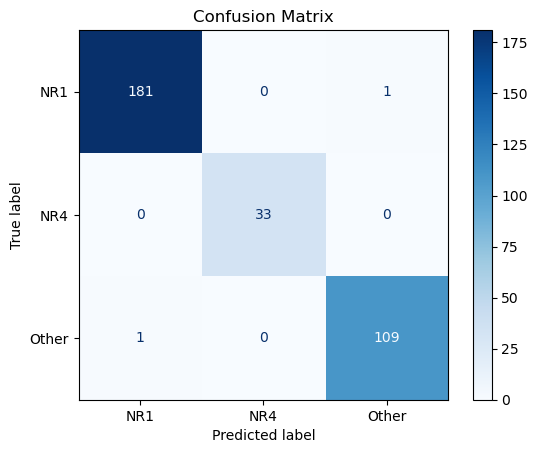

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay

# Step 1: Get predicted probabilities
# y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class (Clade = 1)

# Step 2: Plot the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.show()

# Step 3: Plot the predicted probabilities
# plt.figure()
# sns.histplot(y_pred_prob, bins=20, kde=True)
# plt.xlabel('Predicted Probability of Positive Class (Clade = 1)')
# plt.ylabel('Frequency')
# plt.title('Distribution of Predicted Probabilities')
# plt.show()


original_labels = ['NR1', 'NR4', 'Other']
# original_labels = le.classes_
# Step 4: Plot the Confusion Matrix as a heatmap
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test,  display_labels=original_labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()



Fold 1


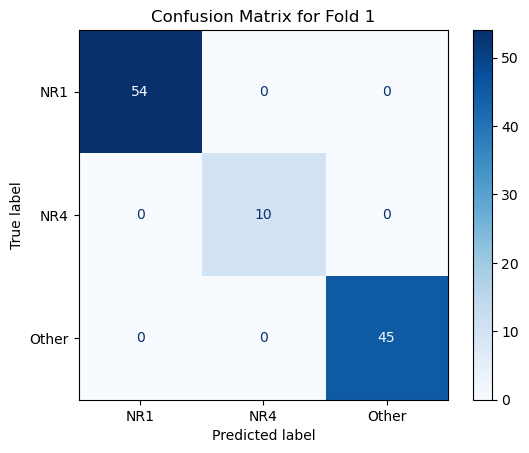


Fold 2


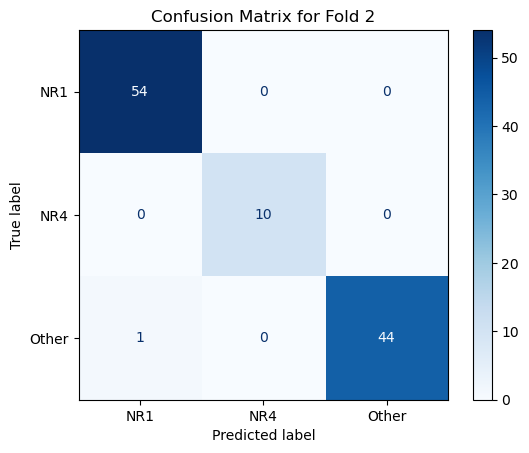


Fold 3


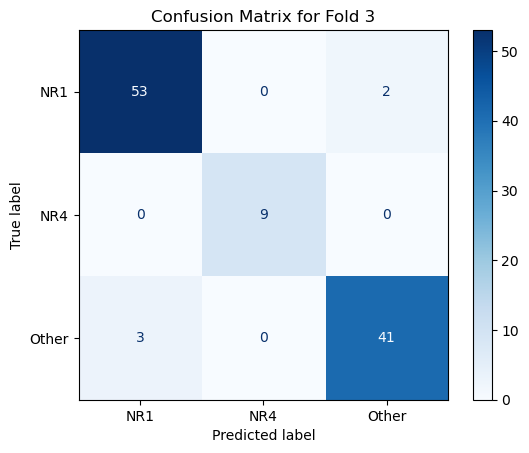


Fold 4


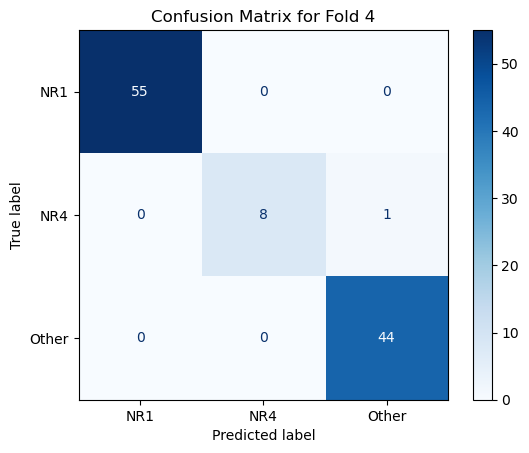


Fold 5


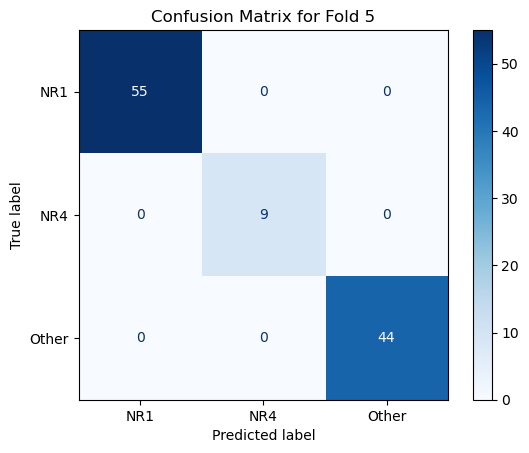


Fold 6


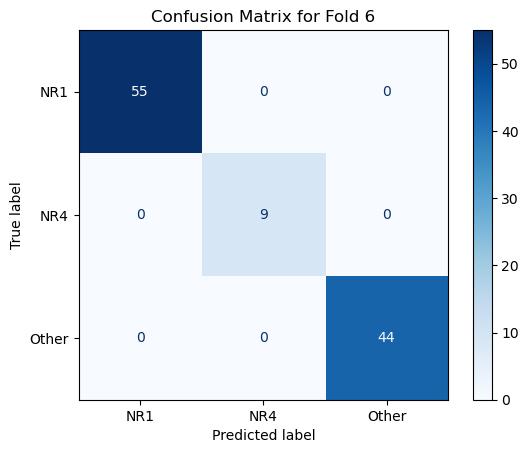


Fold 7


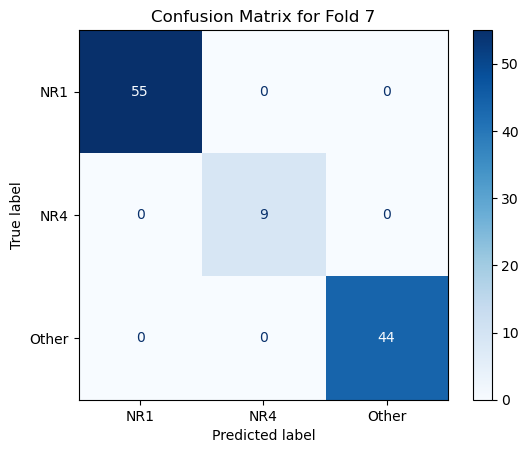


Fold 8


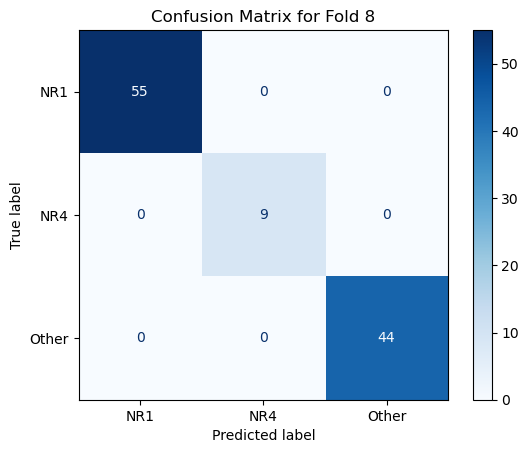


Fold 9


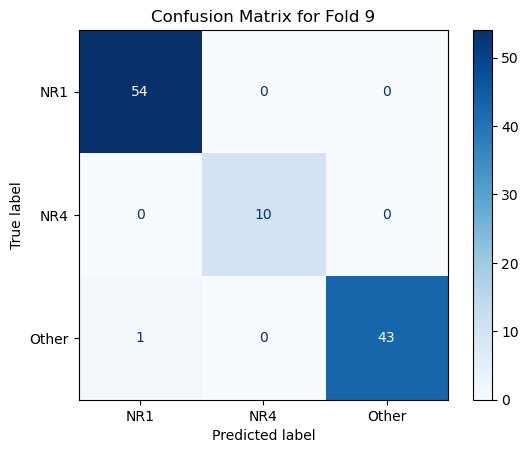


Fold 10


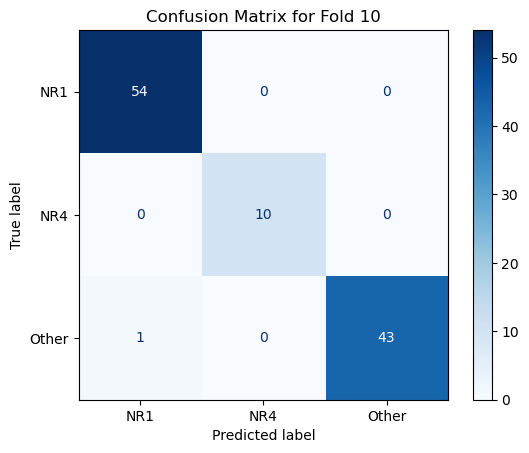


Overall Confusion Matrix across all folds:


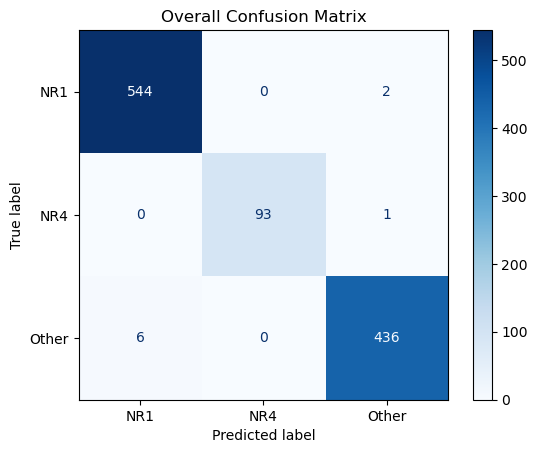


Cross-Validation Results
Average Accuracy: 0.9917
Accuracy Scores for Each Fold: [1.0, 0.9908256880733946, 0.9537037037037037, 0.9907407407407407, 1.0, 1.0, 1.0, 1.0, 0.9907407407407407, 0.9907407407407407]


In [176]:

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Encode the Clade column if necessary
le = LabelEncoder()
df['Clade_encoded'] = le.fit_transform(df['Clade'])

# Step 2: Define features (X) and target (y)
X = df.drop(columns=['Clade', 'Clade_encoded'])  # Drop non-numerical columns
y = df['Clade_encoded']

# Step 3: Set up Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 5-fold cross-validation
accuracy_scores = []
confusion_matrices = []

# Lists to accumulate true and predicted labels for overall confusion matrix
all_y_true = []
all_y_pred = []

for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"\nFold {fold + 1}")

    # Split into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data to handle class imbalance
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # Train the logistic regression model
    model = LogisticRegression(max_iter=100_000)  # Adjust max_iter as necessary
    model.fit(X_train_scaled, y_train_resampled)

    # Predict and evaluate the model
    y_pred = model.predict(X_test_scaled)

    # Append true and predicted labels for this fold
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Generate and store the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    # Display the confusion matrix for each fold
    ConfusionMatrixDisplay(conf_matrix, display_labels=le.classes_).plot(cmap='Blues')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# Calculate overall confusion matrix
overall_conf_matrix = confusion_matrix(all_y_true, all_y_pred)

# Display overall confusion matrix
print("\nOverall Confusion Matrix across all folds:")
ConfusionMatrixDisplay(overall_conf_matrix, display_labels=le.classes_).plot(cmap='Blues')
plt.title("Overall Confusion Matrix")
plt.show()

# Print average accuracy
print("\nCross-Validation Results")
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Accuracy Scores for Each Fold: {accuracy_scores}")

In [116]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Step 1: Binarize the output labels for multiclass ROC curve
n_classes = len(le.classes_)  # Number of unique classes in Clade
y_binarized = label_binarize(y_test, classes=range(n_classes))

# Step 2: Fit the One-vs-Rest Logistic Regression
ovr_classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovr_classifier.fit(X_train_scaled, y_train)

# Step 3: Predict probabilities for each class
y_pred_prob = ovr_classifier.predict_proba(X_test_scaled)

# Step 4: Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Logistic Regression (OvR)')
plt.legend(loc="lower right")
plt.show()

# Step 5: Plot the Confusion Matrix for the multiclass case
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(ovr_classifier, X_test_scaled, y_test, cmap='Blues')
plt.title('Multiclass Confusion Matrix')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [1092, 757]

# version with only nr1/nr4 data

/var/folders/xj/l_c4n_qs0817y_gr39wb6pg80000gn/T/ipykernel_76671/2865926566.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Clade_encoded'] = le.fit_transform(df_filtered['Clade'])


Shape of X: (640, 1024)
Shape of y: (640,)
X_train shape: (512, 1024)
X_test shape: (128, 1024)
y_train shape: (512,)
y_test shape: (128,)
X_train_scaled shape: (512, 1024)
X_test_scaled shape: (128, 1024)
Accuracy: 1.0
Confusion Matrix: 
[[104   0]
 [  0  24]]


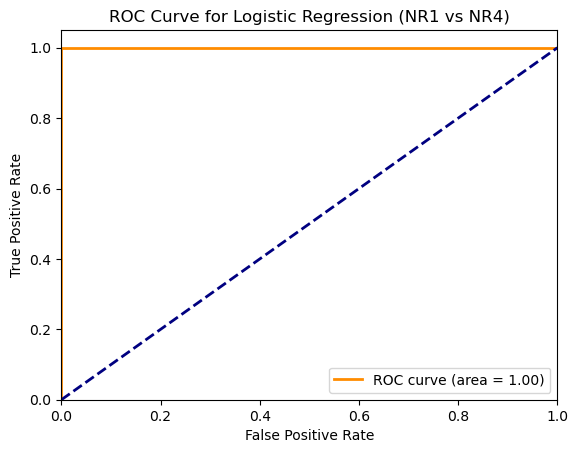

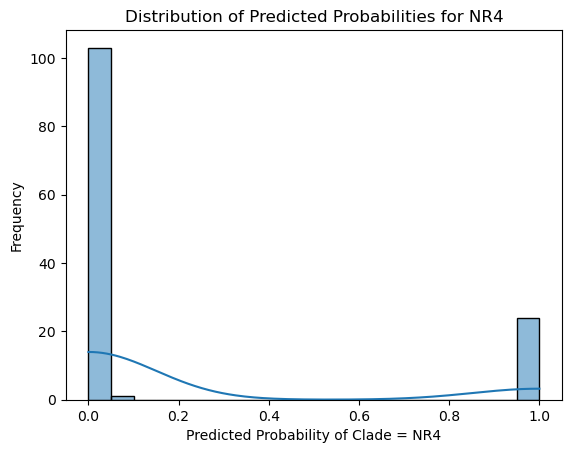

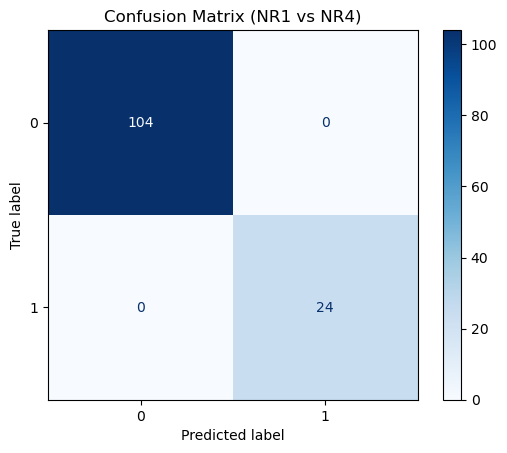

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter the dataframe to keep only Clade = 'NR1' or 'NR4'
df_filtered = df[df['Clade'].isin(['NR1', 'NR4'])]

# Step 2: Encode the Clade column
le = LabelEncoder()
df_filtered['Clade_encoded'] = le.fit_transform(df_filtered['Clade'])

# Step 3: Define features (X) and target (y)
X = df_filtered.drop(columns=['Clade', 'Clade_encoded'])  # Drop non-numerical columns
y = df_filtered['Clade_encoded']

# Check the consistency of X and y before splitting
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the consistency of training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Step 5: Scale the features (apply scaling only to X, not y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the consistency of scaled data
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

# Step 6: Train the logistic regression model
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train_scaled, y_train)
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Step 7: Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class (Clade = 'NR4')

# Evaluate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{conf_matrix}")

# Step 8: Visualizations

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression (NR1 vs NR4)')
plt.legend(loc="lower right")
plt.show()

# Plot the predicted probabilities
plt.figure()
sns.histplot(y_pred_prob, bins=20, kde=True)
plt.xlabel('Predicted Probability of Clade = NR4')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities for NR4')
plt.show()

# Plot the Confusion Matrix as a heatmap
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='Blues')
plt.title('Confusion Matrix (NR1 vs NR4)')
plt.show()


In [62]:
with open('../logregtest_df.csv', 'r') as input:
    df = pd.read_csv(input)


print(df.columns)

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

Index(['Unnamed: 0', 'Clade', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022',
       '1023'],
      dtype='object', length=1026)


,Clade,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,Other,-0.012716,0.075310,-0.031743,-0.311650,0.064559,-0.094649,0.102135,0.091691,-0.245344,...,0.029238,-0.269981,0.095751,-0.204868,-0.508713,-0.589032,-0.148013,-0.118036,-0.162274,-0.228878
1,Other,-0.000579,0.113182,0.011561,-0.278300,-0.015825,-0.126106,0.146727,0.190932,-0.292280,...,0.055398,-0.261072,0.114731,-0.159509,-0.524093,-0.470052,-0.166740,-0.181831,-0.091401,-0.267470
2,Other,-0.002152,0.114452,0.003671,-0.274833,-0.025231,-0.122571,0.149635,0.187354,-0.277033,...,0.038601,-0.257720,0.112493,-0.161743,-0.530528,-0.460306,-0.161191,-0.182176,-0.102340,-0.277791
3,Other,0.011442,0.108292,0.036612,-0.278402,-0.013371,-0.098801,0.126109,0.148009,-0.236601,...,0.053015,-0.272954,0.115622,-0.135069,-0.607785,-0.540449,-0.227975,-0.225880,-0.083361,-0.317356
4,Other,0.021269,0.107990,0.033377,-0.285039,0.006362,-0.139544,0.117882,0.141900,-0.218672,...,0.005007,-0.255665,0.106898,-0.103109,-0.587321,-0.609225,-0.188791,-0.152623,-0.102898,-0.290594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,Other,0.024458,0.077356,-0.028204,-0.234214,0.141610,-0.055855,0.160610,0.084006,-0.351228,...,0.043993,-0.291143,0.056715,-0.138436,-0.514819,-0.537796,-0.217952,-0.167707,-0.261205,-0.146934
1078,Other,-0.001572,0.094767,-0.076020,-0.258028,0.172052,-0.098984,0.119521,0.116670,-0.312744,...,0.023157,-0.267771,0.099526,-0.175747,-0.504034,-0.606887,-0.147339,-0.078876,-0.229814,-0.164677
1079,Other,0.003975,0.103656,-0.062001,-0.255754,0.165574,-0.095061,0.130275,0.122535,-0.315015,...,0.028265,-0.263244,0.095615,-0.164953,-0.514537,-0.601700,-0.160659,-0.087596,-0.230938,-0.164564
1080,Other,0.032536,0.072395,0.003494,-0.314581,0.174726,-0.107231,0.100944,0.112198,-0.255413,...,0.054200,-0.265759,0.107152,-0.070363,-0.527493,-0.685247,-0.177666,-0.148000,-0.215106,-0.220665
